In [1]:
# State Vectors
import qiskit as qs
import math

In [2]:
statevector_simulator = qs.Aer.get_backend("statevector_simulator")
qasm_simulator = qs.Aer.get_backend("qasm_simulator")

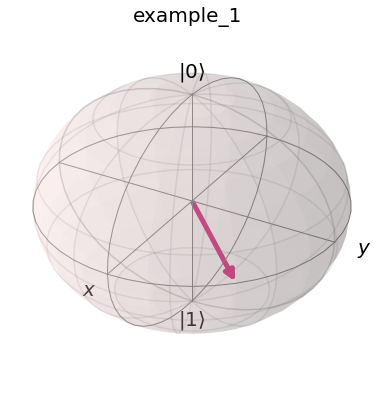

In [3]:
# Bloch Sphere:
x = 1/math.sqrt(2)
y = 1/math.sqrt(2)
z = 0
qs.visualization.plot_bloch_vector([x, y, z], title="example_1")

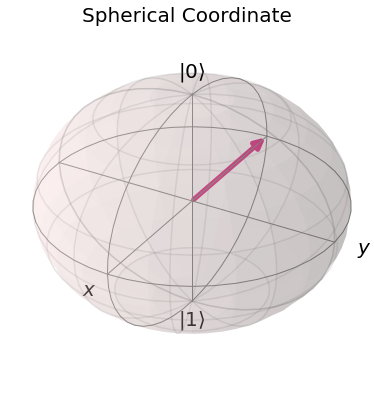

In [4]:
radius = 1
theta = math.pi/2
phi = math.pi
# converting spherical to cartesian coordinate
x = radius * math.sin(theta) * math.cos(phi)
y = radius * math.sin(theta) * math.sin(phi)
z = radius * math.cos(theta)
qs.visualization.plot_bloch_vector([x, y, z], title="Spherical Coordinate")

In [5]:
q_circuit_1 = qs.QuantumCircuit(1)
q_circuit_1.initialize([0, 1], 0)
q_circuit_1.draw()

┌─────────────────┐
q_0: ┤ initialize(0,1) ├
     └─────────────────┘

[0.+0.j 1.+0.j]


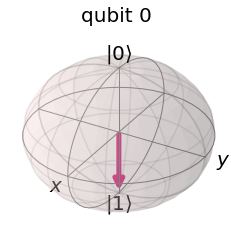

In [6]:
result_1 = qs.execute(q_circuit_1, statevector_simulator).result()
# no measurement so we are only simulating the manipulations on statevector of qubits.
print(result_1.get_statevector())
# plotting q_circuit_1 state |1>
qs.visualization.plot_bloch_multivector(result_1.get_statevector())

In [7]:
q_circuit_1.measure_all()
q_circuit_1.draw()

┌─────────────────┐ ░ ┌─┐
   q_0: ┤ initialize(0,1) ├─░─┤M├
        └─────────────────┘ ░ └╥┘
meas: 1/═══════════════════════╩═
                               0

{'1': 1}


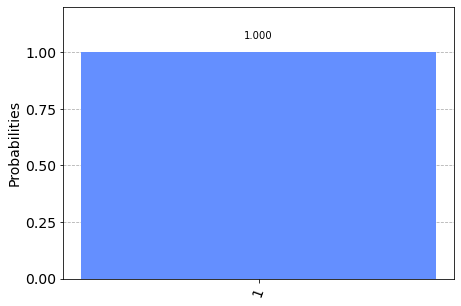

In [8]:
result_1 = qs.execute(q_circuit_1, statevector_simulator).result()
print(result_1.get_counts())
qs.visualization.plot_histogram(result_1.get_counts())

In [9]:
q_circuit_2 = qs.QuantumCircuit(1)
q_circuit_2.initialize([0, 1j], 0) # completely complex state. But probability is still 1
q_circuit_2.draw()

┌──────────────────┐
q_0: ┤ initialize(0,1j) ├
     └──────────────────┘

statevector:  [0.+0.j 0.+1.j]
counts:  {'1': 1.0}


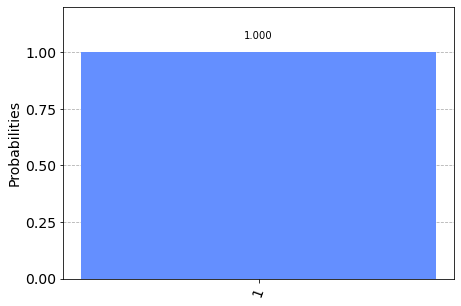

In [17]:
result_2 = qs.execute(q_circuit_2, statevector_simulator).result()
print("statevector: ", result_2.get_statevector())
print("counts: ", result_2.get_counts())
qs.visualization.plot_histogram(result_2.get_counts())

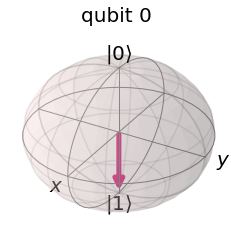

In [18]:
# plotting q_circuit_2 state [0, 1.j]
qs.visualization.plot_bloch_multivector(result_2.get_statevector())

In [20]:
# Qubit in Superposition
q_circuit_3 = qs.QuantumCircuit(1)
q_circuit_3.initialize([0. + 1.j/math.sqrt(2), 1/math.sqrt(2) + 0.j], 0)
q_circuit_3.draw()

┌──────────────────────────────┐
q_0: ┤ initialize(0.70711j,0.70711) ├
     └──────────────────────────────┘

statevector:  [0.        +0.70710678j 0.70710678+0.j        ]
statevector:  {'0': 0.5, '1': 0.5}


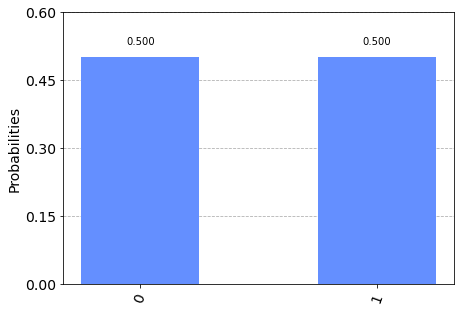

In [21]:
result_3 = qs.execute(q_circuit_3, statevector_simulator).result()
print("statevector: ", result_3.get_statevector())
print("statevector: ", result_3.get_counts())
qs.visualization.plot_histogram(result_3.get_counts())

[0.        +0.70710678j 0.70710678+0.j        ]


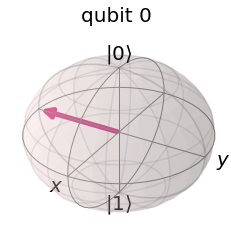

In [22]:
# plotting q_circuit_3 state (after measurement)
print(result_3.get_statevector())
qs.visualization.plot_bloch_multivector(result_3.get_statevector())

In [23]:
# This is simulation of statevector before measurement. Lets add measurement and we will see state collapse to only |0> or |1> (no longer in superposition)
q_circuit_3.measure_all()
q_circuit_3.draw()

┌──────────────────────────────┐ ░ ┌─┐
   q_0: ┤ initialize(0.70711j,0.70711) ├─░─┤M├
        └──────────────────────────────┘ ░ └╥┘
meas: 1/════════════════════════════════════╩═
                                            0

statevector:  [0.+0.j 1.+0.j]
counts:  {'1': 1}


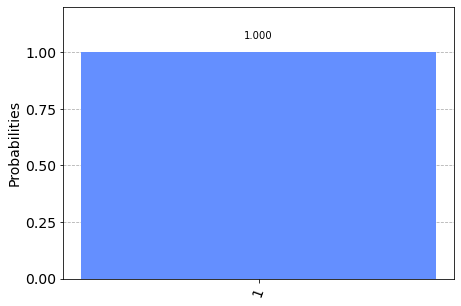

In [28]:
# Run this bloch multiple times to see the measurement change and also notice statevector is no longer in super position because of collapse.
result_4 = qs.execute(q_circuit_3, statevector_simulator).result()
print("statevector: ", result_4.get_statevector())
print("counts: ", result_4.get_counts())
qs.visualization.plot_histogram(result_4.get_counts())

[0.+0.j 1.+0.j]


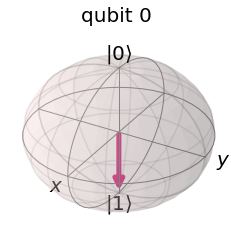

In [29]:
# plotting q_circuit_3 state (after measurement)
print(result_4.get_statevector())
qs.visualization.plot_bloch_multivector(result_4.get_statevector())